In [19]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym


In [20]:
def explicit_schema(x_p, t_p, u_p, a, T, kappa, N, M, x, t, f, mu, mu_1, mu_2):  # явная схема
    h = a / N
    tau = T / M
    for k in range(1, M + 1):
        for i in range(0, N + 1):
            u_p[i, 0] = mu.subs(x, x_p[i])
        for i in range(1, N):
            u_p[i, k] = tau * kappa * (u_p[i + 1, k - 1] - 2 * u_p[i, k - 1] + u_p[i - 1, k - 1]) / (h * h) + \
                        tau * f.subs([(x, x_p[i]), (t, t_p[k - 1])]) + u_p[i, k - 1]
        u_p[0, k] = mu_1.subs(t, t_p[k])
        u_p[N, k] = mu_2.subs(t, t_p[k])
    X, T = np.meshgrid(x_p, t_p, indexing='ij')
    return X, T, u_p

In [21]:
def implicit_schema(x_p, t_p, u_p, a, T, kappa, N, M, x, t, f, mu, mu_1, mu_2):  # неявная схема
    A = np.zeros(N + 1, dtype=float)
    B = np.ones(N + 1, dtype=float)
    C = np.zeros(N + 1, dtype=float)
    D = np.zeros(N + 1, dtype=sym.Symbol)
    h = a / N
    tau = T / M
    for k in range(1, M + 1):
        D[0] = mu_1.subs(t, t_p[k])
        D[N] = mu_2.subs(t, t_p[k])
        for i in range(0, N + 1):
            u_p[i, 0] = mu.subs(x, x_p[i])
        for i in range(1, N):
            A[i] = kappa / (h * h)
            B[i] = - 2 * kappa / (h * h) - 1 / tau
            C[i] = kappa / (h * h)
            D[i] = - u_p[i, k - 1] / tau - f.subs([(x, x_p[i]), (t, t_p[k])])
        s = np.zeros(N + 1, dtype=float)
        t1 = np.zeros(N + 1, dtype=float)
        s[0] = - C[0] / B[0]
        t1[0] = D[0] / B[0]
        for i in range(1, N + 1):
            s[i] = -C[i] / (A[i] * s[i - 1] + B[i])
            t1[i] = (D[i] - A[i] * t1[i - 1]) / (A[i] * s[i - 1] + B[i])
        u_p[N, k] = t1[N]
        for i in range(N - 1, -1, -1):
            u_p[i, k] = s[i] * u_p[i + 1, k] + t1[i]
    X, T = np.meshgrid(x_p, t_p, indexing='ij')
    return X, T, u_p

In [22]:
def find_functions(u, a, x, t, kappa):
    f = sym.diff(u, t, 1) - kappa * sym.diff(u, x, 2)
    mu = u.subs(t, 0)
    mu_1 = u.subs(x, 0)
    mu_2 = u.subs(x, a)
    return f, mu, mu_1, mu_2

Тестовые данные:

1. $u = x^2/ 4 + t^2/4$

In [23]:
u1=x ** 2 / 4 + t ** 2 / 4

2.  $u = t * x$

In [24]:
u2=t * x

3. $u = x*t^3 - 2 * x + 25 - x^5$

In [25]:
u3=x * t ** 3 - 2 * x + 25 - x ** 5 

Рисуем графики

In [29]:
def print_plt(u, kappa):
    x = sym.symbols('x')
    t = sym.symbols('t')
    N = 100
    M = 100
    a = 10
    T = 10
    x_p = np.zeros(N + 1, dtype=float)
    t_p = np.zeros(M + 1, dtype=float)
    u_p = np.zeros((N + 1, M + 1), dtype=float)
    h = a / N
    tau = T / M
    for i in range(N + 1):
        x_p[i] = i * h
    for i in range(M + 1):
        t_p[i] = i * tau
    f, mu, mu_1, mu_2 = find_functions(u, a, x, t, kappa)
    print("f =", f)
    print("mu =", mu)
    print("mu1 =", mu_1)
    print("mu2 =", mu_2)
    X, T, u_p = explicit_schema(x_p, t_p, u_p, a, T, kappa, N, M, x, t, f, mu, mu_1, mu_2)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_wireframe(X, T, u_p)
    ax.set_xlabel('x')
    ax.set_ylabel('t')
    ax.set_zlabel('u')
    plt.show()


f = t/2 - 0.05
mu = x**2/4
mu1 = t**2/4
mu2 = t**2/4 + 25


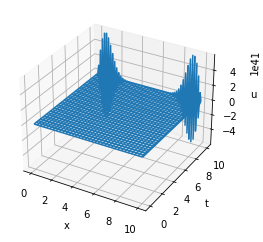

kappa: 0.1
f = t/2 - 0.005
mu = x**2/4
mu1 = t**2/4
mu2 = t**2/4 + 25


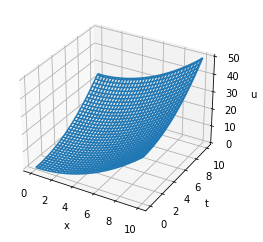

kappa: 0.01
f = x
mu = 0
mu1 = 0
mu2 = 10*t


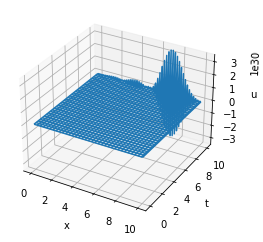

kappa: 0.1
f = x
mu = 0
mu1 = 0
mu2 = 10*t


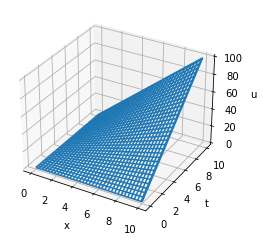

kappa: 0.01
f = 3*t**2*x + 2.0*x**3
mu = -x**5 - 2*x + 25
mu1 = 25
mu2 = 10*t**3 - 99995


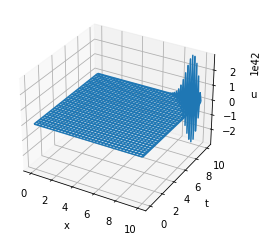

kappa: 0.1
f = 3*t**2*x + 0.2*x**3
mu = -x**5 - 2*x + 25
mu1 = 25
mu2 = 10*t**3 - 99995


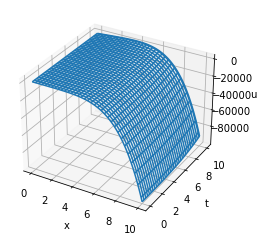

kappa: 0.01


In [31]:
for u in (u1, u2, u3):
    for kappa in (1e-1, 1e-2):
        print_plt(u,kappa)
        print('kappa:', kappa)

In [39]:
def print_plt_imp(u, kappa):
    x = sym.symbols('x')
    t = sym.symbols('t')
    N = 100
    M = 100
    a = 10
    T = 10
    x_p = np.zeros(N + 1, dtype=float)
    t_p = np.zeros(M + 1, dtype=float)
    u_p = np.zeros((N + 1, M + 1), dtype=float)
    h = a / N
    tau = T / M
    for i in range(N + 1):
        x_p[i] = i * h
    for i in range(M + 1):
        t_p[i] = i * tau
    f, mu, mu_1, mu_2 = find_functions(u, a, x, t, kappa)
    print("f =", f)
    print("mu =", mu)
    print("mu1 =", mu_1)
    print("mu2 =", mu_2)
    X, T, u_p = implicit_schema(x_p, t_p, u_p, a, T, kappa, N, M, x, t, f, mu, mu_1, mu_2)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_wireframe(u_p, T, X)
    ax.set_xlabel('x')
    ax.set_ylabel('t')
    ax.set_zlabel('u')
    plt.show()

f = t/2 - 0.05
mu = x**2/4
mu1 = t**2/4
mu2 = t**2/4 + 25


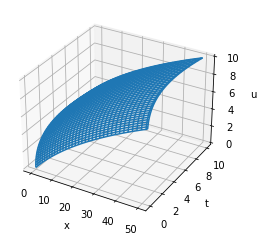

kappa: 0.1
f = t/2 - 0.005
mu = x**2/4
mu1 = t**2/4
mu2 = t**2/4 + 25


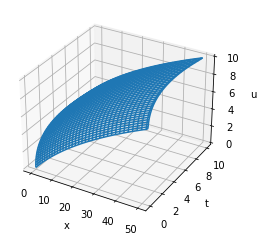

kappa: 0.01
f = x
mu = 0
mu1 = 0
mu2 = 10*t


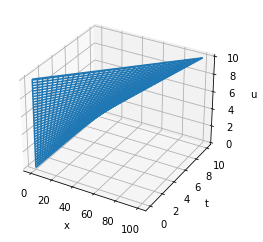

kappa: 0.1
f = x
mu = 0
mu1 = 0
mu2 = 10*t


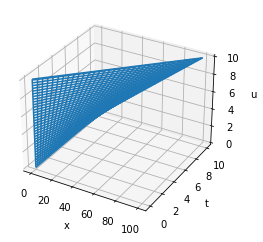

kappa: 0.01
f = 3*t**2*x + 2.0*x**3
mu = -x**5 - 2*x + 25
mu1 = 25
mu2 = 10*t**3 - 99995


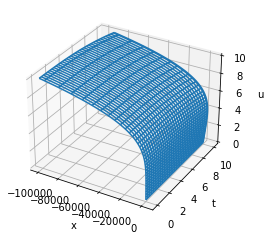

kappa: 0.1
f = 3*t**2*x + 0.2*x**3
mu = -x**5 - 2*x + 25
mu1 = 25
mu2 = 10*t**3 - 99995


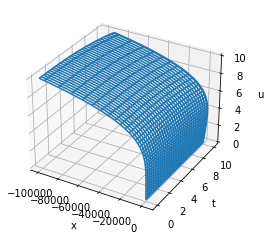

kappa: 0.01


In [40]:
for u in (u1, u2, u3):
    for kappa in (1e-1, 1e-2):
        print_plt_imp(u,kappa)
        print('kappa:', kappa)